# **Bitcoin and Cryptocurrencies: Full Dateset, filtering and reproduciblity**

Since the launch of Bitcoin 1n 2008, hundreds of similar project based on blockchain technology have emerged. We call these cryptocurrencies. Some are extremely valuable nowdays, and others may have potential to become extermely valuable in the future. In fact, in December 2017, Bitcoin has a market captialization above $200 billion.

**Note:** The cryptocurrency market is exceptionally volitile and money you put in might disappear into thin air.
The data used is collected from coinmarketcap API which was saved on 6th of December of 2017 using a API call.

In [ ]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
import pandas as pd

#importing matplotlib and setting neccisseties fro plotting later
import matplotlib.pyplot as plt
!matplotlib inline
!config Inlinebackend.figure_format='svg'
plt.style.use('fivethirtyeight')

#reading dataset
df= pd.read_csv('Dataset/coinmarketcap_06122017.csv')

#selecting id and the market_capcolumn
market_cap_raw=df[['id','market_cap_usd']]

/bin/bash: line 1: matplotlib: command not found
/bin/bash: line 1: config: command not found


In [ ]:
df

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000e+00,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,3.617670e-02,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,1.200500e-01,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,4.241800e-04,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,1.932000e-05,0.241754,5,XRP,9.999309e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,1321,NaN,NaN,turbocoin,1512368664,NaN,NaN,TurboCoin,NaN,NaN,8.12,1.000000e-08,0.000114,1322,TURBO,NaN
1322,1322,NaN,NaN,birds,1512535772,NaN,NaN,Birds,NaN,10.62,-42.10,1.000000e-08,0.000122,1323,BIRDS,NaN
1323,1323,NaN,NaN,bitcoincashscrypt,1512548078,NaN,NaN,BitcoinCashScrypt,-0.37,-37.39,-27.69,5.000000e-07,0.006202,1324,BCCS,2.502380e+06
1324,1324,NaN,NaN,swisscoin,1512540278,NaN,NaN,Swisscoin,NaN,4.39,-22.84,1.000000e-08,0.000123,1325,SIC,1.020000e+10


In [ ]:
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

# **2. Discard the cryptocurrencies without a market capitalization**

We can see above that there is a diffrence between count value of *id* and *market_cap_usd*, why is this so? This diffrence is because of no known market capitalization of some cryptocurrencies in coinmarketcap.com, thus represented as *NaN* in the data and are not counted by *count()*. These cryptocurrencies are of little use in the analysis, so it's better to remove from data.

In [ ]:
#filtering out rows without a market capitalization
cap=market_cap_raw.dropna()

In [ ]:
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

In [ ]:
cap

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
...,...,...
1026,future-digital-currency,2.510000e+02
1027,environ,1.360000e+02
1028,caliphcoin,1.000000e+02
1029,falcoin,2.300000e+01


# **3. How big Bitcoin is compared to other cryptocurrencies?**

As mentioned above that market capitalization of Bitcoin in December 2017 was $200 billion and still it is dominant in market capitalization though it have some tough competitors. Let us plot a graph of top 10 coins in market capitalization using barplot for better visualization.

Text(0, 0.5, '% of total cap')

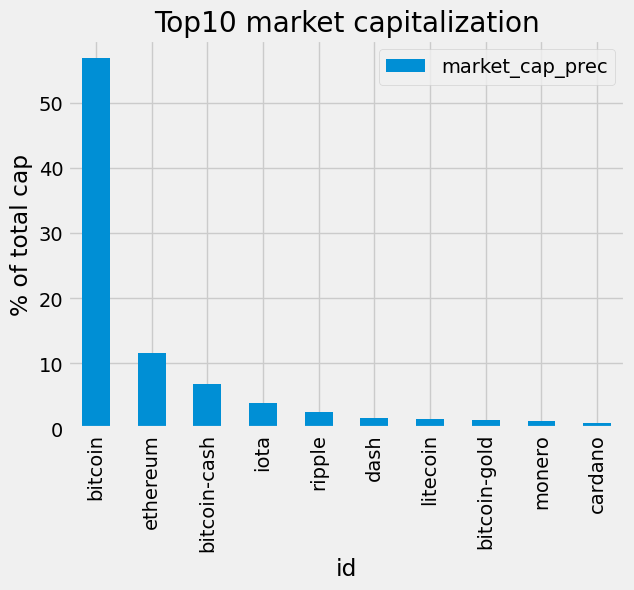

In [ ]:
#selecting the first 10 rows and selecting the indexe
cap10=cap.head(10).set_index(cap.id[:10])

#calculating market_cap_perc
cap10=cap10.assign(market_cap_prec=lambda x:(x.market_cap_usd/cap.market_cap_usd.sum())*100)

#plotting the barplot
ax=cap10.plot.bar(x='id',y='market_cap_prec',title='Top10 market capitalization')
ax.set_ylabel('% of total cap')

In [ ]:
cap10

,id,market_cap_usd,market_cap_prec
id,,,
bitcoin,bitcoin,2.130493e+11,56.918669
ethereum,ethereum,4.352945e+10,11.629410
bitcoin-cash,bitcoin-cash,2.529585e+10,6.758088
iota,iota,1.475225e+10,3.941238
ripple,ripple,9.365343e+09,2.502063
dash,dash,5.794076e+09,1.547956
litecoin,litecoin,5.634498e+09,1.505323
bitcoin-gold,bitcoin-gold,4.920065e+09,1.314454
monero,monero,4.331688e+09,1.157262


# **4. What is going on? Volatility in Cryptocurrencies**

The note above warns about volitile nature of cryptocurrency market. Let us explore this volitile deeper. We would plot graphs for 24h and 7d perecntage change attribute of data to know more about it's volitile nature.

In [ ]:
#selecting the id, percent_change_24th and perecnt_change_7d column
volatility=df[['id','percent_change_24h','percent_change_7d']]

#selecting the index ti 'id and dropping all NaN rows
volatility=volatility.set_index('id').dropna()

#Sorting the dataframe by percent_change_24 st few rows in descending order
volatility=volatility.sort_values('percent_change_24h', ascending=False)

#checking the first few rows
volatility.head()

,percent_change_24h,percent_change_7d
id,,
fedoracoin,833.01,92.10
cashcoin,457.86,374.30
bitzeny,416.04,3360.71
beatcoin,295.49,132.79
eaglecoin,272.50,114.73


# **5. Well, we can already see that things are bit crazy**

Cryptocurrencies have a great market capitalization value which can make you good money but due to it's volitile nature you can lose money very quickly. Let's plot top 10 gainers and top 10 losers in market capitalization.

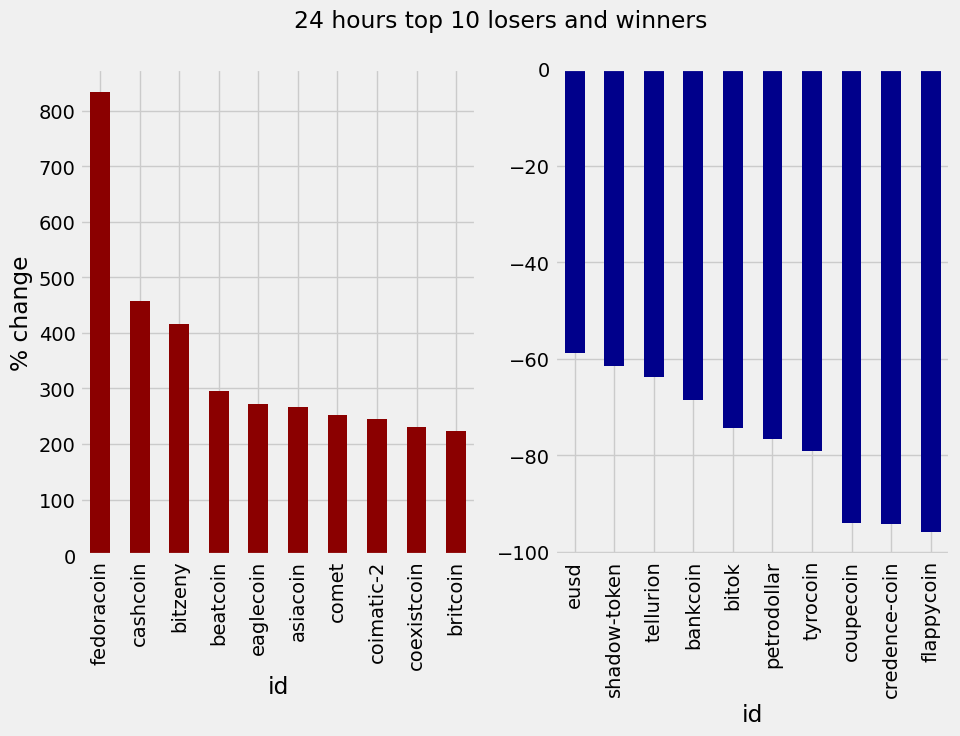

In [ ]:
#defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
  #making the subplot and the figure for 2 side by side plots
  fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(10,6))

  #plotting with pandas the barchart for theop 10 losers
  ax=(volatility_series[:10].plot.bar(color='darkred', ax=axes[0]))

  #setting the figure's main title tothe text passed as parameter
  fig.suptitle(title)
  #setting the ylabel to '% change'
  ax.set_ylabel('% change')
  #same as above, but for top 10 winners
  ax=(volatility_series[-10:].plot.bar(color='darkblue',ax=axes[1]))

  #returning this for good practice, might use later
  return fig, ax

#caling the function above with the 24 hours period series and title
fig, ax = top10_subplot(volatility.percent_change_24h,'24 hours top 10 losers and winners')


# **6. Ok, those are... interseting. Let's check the weekely Series too**
Let's reuse top10_subplot() function to see change weekly instaed of daily.

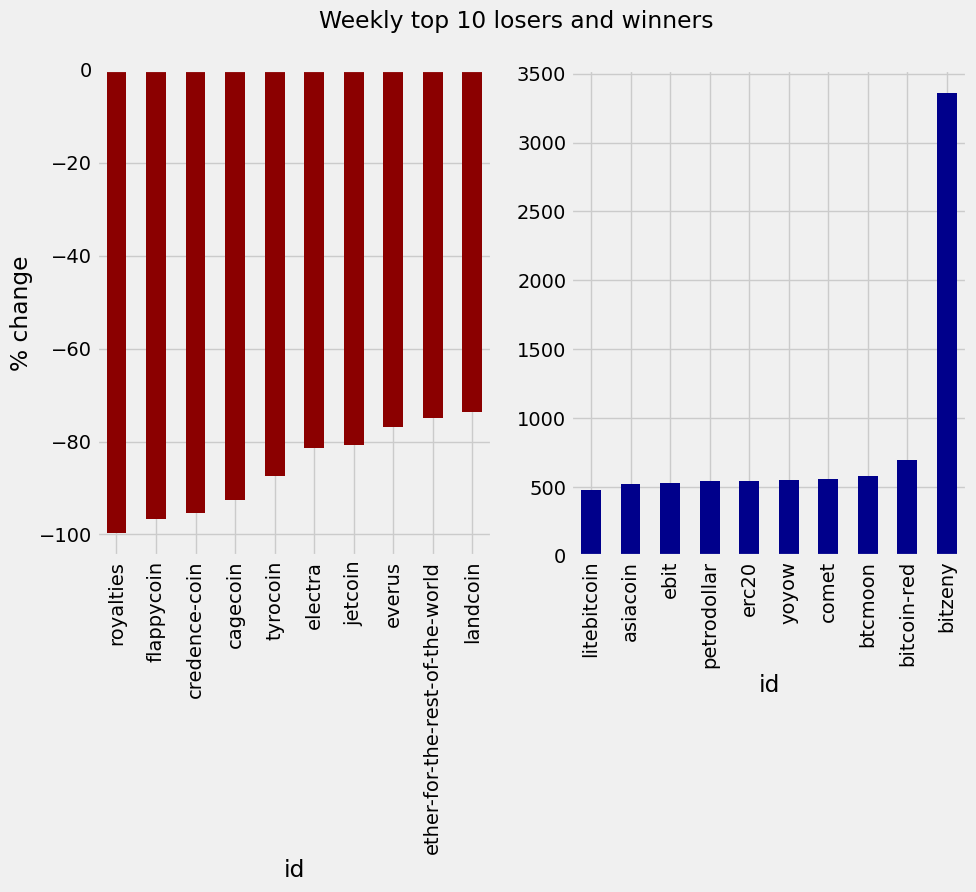

In [ ]:
# sorting in ascending order
volatility7d= volatility.sort_values('percent_change_7d', ascending=True)

#calling the top 10_subplot function
fig, ax= top10_subplot(volatility7d.percent_change_7d,'Weekly top 10 losers and winners')

# **7. How small is small?**
The nameof cryptocurrencies above are unknown and thereis a considerable flucation between 1 and 7 days percentage change. As with stocks, andmany other finicial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones.

In [ ]:
#selecting everyting bigger than 10 billion
largecaps= cap.query('market_cap_usd > 10000000000')
largecaps

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


# **8. Most coins are tiny**
Note that many coins are not comparable to large companies in market cap,so let's divert from the original investopedia defination by merging categories.

<BarContainer object of 3 artists>

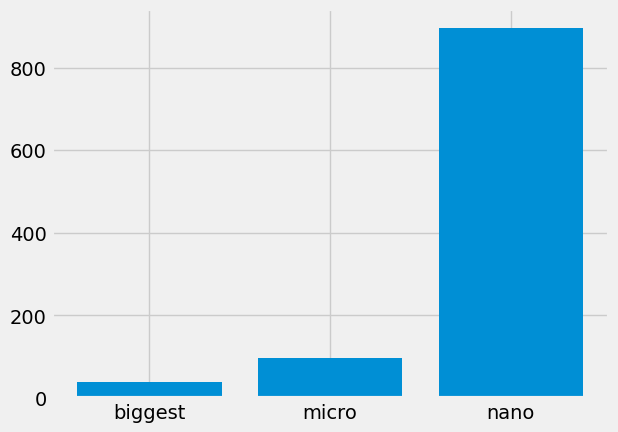

In [ ]:
#making a nice function for counting diffrent markecaps from the cap dataframe. return list
#INSTRUCTION NOTE: Since you made it to the end, consider it a gift

def capcount(query_string):
  return cap.query(query_string).count().id

#labels for plot
labels=['biggest','micro','nano']

#using capcount countthe biggest cryptocurriency
biggest=capcount('market_cap_usd > 300000000')

#same as above for micro...
micro=capcount('market_cap_usd > 50000000 & market_cap_usd < 300000000')

#..... and for nano
nano= capcount('market_cap_usd <50000000')

#making a list with the 3 counts
values=(biggest,micro,nano)

#plotting them with maplotlib
plt.bar(range(len(values)),values, tick_label=labels)